In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sensitivity_analysis_path = r'../output_data/SensitivityAnalysisNetworks.csv'
sensitivity_analysis = pd.read_csv(sensitivity_analysis_path)
columns_to_drop = ['AverageDamagePerIncomeLabel', 'EstimatedAverageDamagePerIncomeLabel', 'AverageIncomeToDamageRatio', 'EstimatedAverageIncomeToDamageRatio']
sensitivity_analysis.drop(columns = columns_to_drop, inplace = True)
sensitivity_analysis

,RunId,iteration,Step,number_of_households,number_of_steps,flood_map_choice,network,TotalAdaptedHouseholds,TotalActualDamage,TotalExpectedDamage,...,EstimatedAverageDamagePerRichHousehold,EstimatedAverageIncomeToDamagePoorHousehold,EstimatedAverageIncomeToDamageMiddleClassHousehold,EstimatedAverageIncomeToDamageRichHousehold,AverageDamagePerPoorHousehold,AverageDamagePerMiddleClassHousehold,AverageDamagePerRichHousehold,AverageIncomeToDamagePoorHousehold,AverageIncomeToDamageMiddleClassHousehold,AverageIncomeToDamageRichHousehold
0,0,0,0,1000,80,100yr,watts_strogatz,0,0.000000e+00,3.333918e+07,...,80716.074597,3.120445,1.159867,0.906841,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
1,0,0,1,1000,80,100yr,watts_strogatz,82,0.000000e+00,3.030930e+07,...,68421.718051,3.112738,1.057968,0.768714,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
2,0,0,2,1000,80,100yr,watts_strogatz,169,0.000000e+00,2.655789e+07,...,61457.734874,2.981427,0.901153,0.690474,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
3,0,0,3,1000,80,100yr,watts_strogatz,238,0.000000e+00,2.217473e+07,...,49216.075189,2.914300,0.731273,0.552940,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
4,0,0,4,1000,80,100yr,watts_strogatz,269,0.000000e+00,2.031188e+07,...,49216.075189,2.790635,0.641117,0.552940,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16890,399,99,34,1000,80,100yr,no_network,305,0.000000e+00,1.689831e+07,...,57879.973784,1.670103,0.492650,0.664664,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
16891,399,99,35,1000,80,100yr,no_network,306,0.000000e+00,1.687894e+07,...,57879.973784,1.655190,0.492650,0.664664,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
16892,399,99,36,1000,80,100yr,no_network,307,0.000000e+00,1.674576e+07,...,57879.973784,1.655190,0.485922,0.664664,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
16893,399,99,37,1000,80,100yr,no_network,307,0.000000e+00,1.674576e+07,...,57879.973784,1.655190,0.485922,0.664664,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000


First, we start of creating dataframes seperating the full dataframes into dataframes displaying model runs with a specific network. The four networks are: ["watts_strogatz", "erdos_renyi", "barabasi_albert", "no_network"]

We want to analyze the influence of these networks on certain output parameters. Therefore, seperating them is necessary to analyse them one by one.

In [3]:
watts_strogatz = pd.DataFrame()
condition = sensitivity_analysis['network'] == "watts_strogatz"
watts_strogatz = pd.concat([sensitivity_analysis[condition], watts_strogatz], ignore_index=True)

erdos_renyi = pd.DataFrame()
condition = sensitivity_analysis['network'] == "erdos_renyi"
erdos_renyi = pd.concat([sensitivity_analysis[condition], erdos_renyi], ignore_index=True)

barabasi_albert = pd.DataFrame()
condition = sensitivity_analysis['network'] == "barabasi_albert"
barabasi_albert = pd.concat([sensitivity_analysis[condition], barabasi_albert], ignore_index=True)

no_network = pd.DataFrame()
condition = sensitivity_analysis['network'] == "no_network"
no_network = pd.concat([sensitivity_analysis[condition], no_network], ignore_index=True)

# Poor Households

In [4]:
#First, poor households get isolated
estimated_ratio_watts_strogatz = watts_strogatz[['RunId', 'Step', 'EstimatedAverageIncomeToDamagePoorHousehold']]
estimated_ratio_erdos_renyi = erdos_renyi[['RunId', 'Step', 'EstimatedAverageIncomeToDamagePoorHousehold']]
estimated_ratio_barbasi_albert = barabasi_albert[['RunId', 'Step', 'EstimatedAverageIncomeToDamagePoorHousehold']]
estimated_ratio_no_network = no_network[['RunId', 'Step', 'EstimatedAverageIncomeToDamagePoorHousehold']]

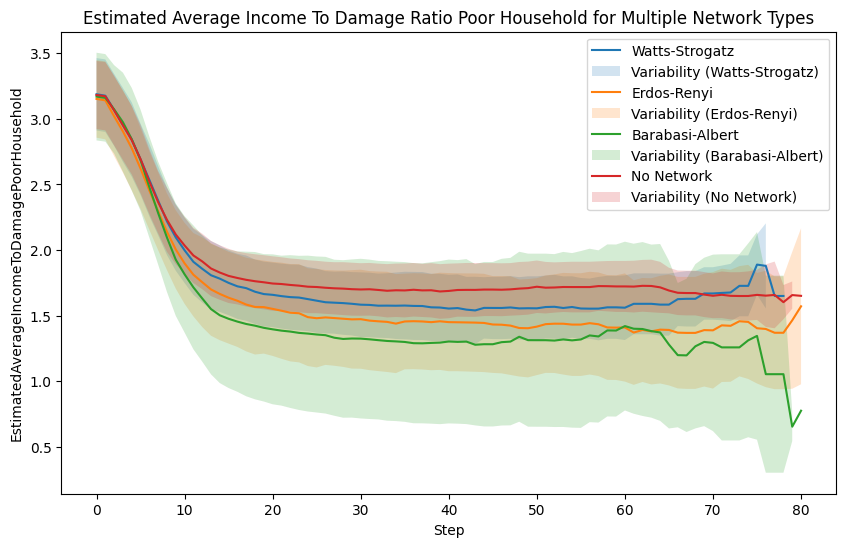

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming 'estimated_ratio_watts_strogatz' is your DataFrame with columns 'RunId', 'Step', and 'EstimatedAverageIncomeToDamagePoorHousehold'
# Assuming 'estimated_ratio_erdos_renyi' is another DataFrame with the same structure
# Assuming 'estimated_ratio_barbasi_albert' is another DataFrame with the same structure
# Assuming 'estimated_ratio_no_network' is another DataFrame with the same structure

# Calculate the mean and standard deviation for each step in the first DataFrame
mean_values_watts_strogatz = estimated_ratio_watts_strogatz.groupby('Step')['EstimatedAverageIncomeToDamagePoorHousehold'].mean()
std_values_watts_strogatz = estimated_ratio_watts_strogatz.groupby('Step')['EstimatedAverageIncomeToDamagePoorHousehold'].std()

# Calculate the mean and standard deviation for each step in the second DataFrame
mean_values_erdos_renyi = estimated_ratio_erdos_renyi.groupby('Step')['EstimatedAverageIncomeToDamagePoorHousehold'].mean()
std_values_erdos_renyi = estimated_ratio_erdos_renyi.groupby('Step')['EstimatedAverageIncomeToDamagePoorHousehold'].std()

# Calculate the mean and standard deviation for each step in the third DataFrame
mean_values_barbasi_albert = estimated_ratio_barbasi_albert.groupby('Step')['EstimatedAverageIncomeToDamagePoorHousehold'].mean()
std_values_barbasi_albert = estimated_ratio_barbasi_albert.groupby('Step')['EstimatedAverageIncomeToDamagePoorHousehold'].std()

# Calculate the mean and standard deviation for each step in the fourth DataFrame
mean_values_no_network = estimated_ratio_no_network.groupby('Step')['EstimatedAverageIncomeToDamagePoorHousehold'].mean()
std_values_no_network = estimated_ratio_no_network.groupby('Step')['EstimatedAverageIncomeToDamagePoorHousehold'].std()

# Plot the mean line for the first DataFrame
ax.plot(mean_values_watts_strogatz.index, mean_values_watts_strogatz, label='Watts-Strogatz')

# Fill between the upper and lower bounds for the first DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_watts_strogatz.index, mean_values_watts_strogatz - std_values_watts_strogatz, mean_values_watts_strogatz + std_values_watts_strogatz, alpha=0.2, label='Variability (Watts-Strogatz)')

# Plot the mean line for the second DataFrame
ax.plot(mean_values_erdos_renyi.index, mean_values_erdos_renyi, label='Erdos-Renyi')

# Fill between the upper and lower bounds for the second DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_erdos_renyi.index, mean_values_erdos_renyi - std_values_erdos_renyi, mean_values_erdos_renyi + std_values_erdos_renyi, alpha=0.2, label='Variability (Erdos-Renyi)')

# Plot the mean line for the third DataFrame
ax.plot(mean_values_barbasi_albert.index, mean_values_barbasi_albert, label='Barabasi-Albert')

# Fill between the upper and lower bounds for the third DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_barbasi_albert.index, mean_values_barbasi_albert - std_values_barbasi_albert, mean_values_barbasi_albert + std_values_barbasi_albert, alpha=0.2, label='Variability (Barabasi-Albert)')

# Plot the mean line for the fourth DataFrame
ax.plot(mean_values_no_network.index, mean_values_no_network, label='No Network')

# Fill between the upper and lower bounds for the fourth DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_no_network.index, mean_values_no_network - std_values_no_network, mean_values_no_network + std_values_no_network, alpha=0.2, label='Variability (No Network)')

# Customize labels and title
ax.set_xlabel('Step')
ax.set_ylabel('EstimatedAverageIncomeToDamagePoorHousehold')
ax.set_title('Estimated Average Income To Damage Ratio Poor Household for Multiple Network Types')

# Show legend
ax.legend()

# Display the plot
plt.show()


In [6]:
estimated_damage_watts_strogatz = watts_strogatz[['RunId', 'Step', 'EstimatedAverageDamagePerPoorHousehold']]
estimated_damage_erdos_renyi = erdos_renyi[['RunId', 'Step', 'EstimatedAverageDamagePerPoorHousehold']]
estimated_damage_barbasi_albert = barabasi_albert[['RunId', 'Step', 'EstimatedAverageDamagePerPoorHousehold']]
estimated_damage_no_network = no_network[['RunId', 'Step', 'EstimatedAverageDamagePerPoorHousehold']]

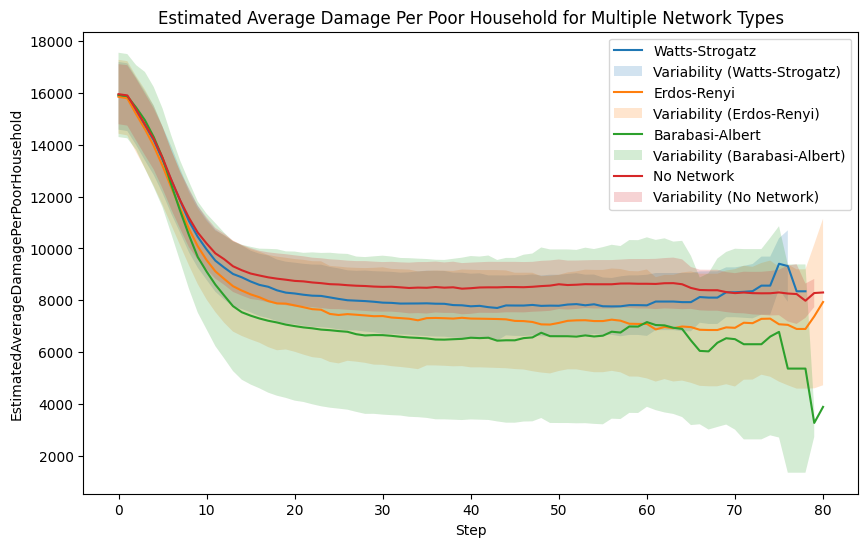

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

# Assuming 'estimated_damage_watts_strogatz' is your DataFrame with columns 'RunId', 'Step', and 'EstimatedAverageDamagePerPoorHousehold'
# Assuming 'estimated_damage_erdos_renyi' is another DataFrame with the same structure
# Assuming 'estimated_damage_barbasi_albert' is another DataFrame with the same structure
# Assuming 'estimated_damage_no_network' is another DataFrame with the same structure

# Calculate the mean and standard deviation for each step in the first DataFrame
mean_values_watts_strogatz = estimated_damage_watts_strogatz.groupby('Step')['EstimatedAverageDamagePerPoorHousehold'].mean()
std_values_watts_strogatz = estimated_damage_watts_strogatz.groupby('Step')['EstimatedAverageDamagePerPoorHousehold'].std()

# Calculate the mean and standard deviation for each step in the second DataFrame
mean_values_erdos_renyi = estimated_damage_erdos_renyi.groupby('Step')['EstimatedAverageDamagePerPoorHousehold'].mean()
std_values_erdos_renyi = estimated_damage_erdos_renyi.groupby('Step')['EstimatedAverageDamagePerPoorHousehold'].std()

# Calculate the mean and standard deviation for each step in the third DataFrame
mean_values_barbasi_albert = estimated_damage_barbasi_albert.groupby('Step')['EstimatedAverageDamagePerPoorHousehold'].mean()
std_values_barbasi_albert = estimated_damage_barbasi_albert.groupby('Step')['EstimatedAverageDamagePerPoorHousehold'].std()

# Calculate the mean and standard deviation for each step in the fourth DataFrame
mean_values_no_network = estimated_damage_no_network.groupby('Step')['EstimatedAverageDamagePerPoorHousehold'].mean()
std_values_no_network = estimated_damage_no_network.groupby('Step')['EstimatedAverageDamagePerPoorHousehold'].std()

# Plot the mean line for the first DataFrame
ax.plot(mean_values_watts_strogatz.index, mean_values_watts_strogatz, label='Watts-Strogatz')

# Fill between the upper and lower bounds for the first DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_watts_strogatz.index, mean_values_watts_strogatz - std_values_watts_strogatz, mean_values_watts_strogatz + std_values_watts_strogatz, alpha=0.2, label='Variability (Watts-Strogatz)')

# Plot the mean line for the second DataFrame
ax.plot(mean_values_erdos_renyi.index, mean_values_erdos_renyi, label='Erdos-Renyi')

# Fill between the upper and lower bounds for the second DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_erdos_renyi.index, mean_values_erdos_renyi - std_values_erdos_renyi, mean_values_erdos_renyi + std_values_erdos_renyi, alpha=0.2, label='Variability (Erdos-Renyi)')

# Plot the mean line for the third DataFrame
ax.plot(mean_values_barbasi_albert.index, mean_values_barbasi_albert, label='Barabasi-Albert')

# Fill between the upper and lower bounds for the third DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_barbasi_albert.index, mean_values_barbasi_albert - std_values_barbasi_albert, mean_values_barbasi_albert + std_values_barbasi_albert, alpha=0.2, label='Variability (Barabasi-Albert)')

# Plot the mean line for the fourth DataFrame
ax.plot(mean_values_no_network.index, mean_values_no_network, label='No Network')

# Fill between the upper and lower bounds for the fourth DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_no_network.index, mean_values_no_network - std_values_no_network, mean_values_no_network + std_values_no_network, alpha=0.2, label='Variability (No Network)')

# Customize labels and title
ax.set_xlabel('Step')
ax.set_ylabel('EstimatedAverageDamagePerPoorHousehold')
ax.set_title('Estimated Average Damage Per Poor Household for Multiple Network Types')

# Show legend
ax.legend()

# Display the plot
plt.show()

# MiddleClass

In [8]:
estimated_ratio_watts_strogatz = watts_strogatz[['RunId', 'Step', 'EstimatedAverageIncomeToDamageMiddleClassHousehold']]
estimated_ratio_erdos_renyi = erdos_renyi[['RunId', 'Step', 'EstimatedAverageIncomeToDamageMiddleClassHousehold']]
estimated_ratio_barbasi_albert = barabasi_albert[['RunId', 'Step', 'EstimatedAverageIncomeToDamageMiddleClassHousehold']]
estimated_ratio_no_network = no_network[['RunId', 'Step', 'EstimatedAverageIncomeToDamageMiddleClassHousehold']]

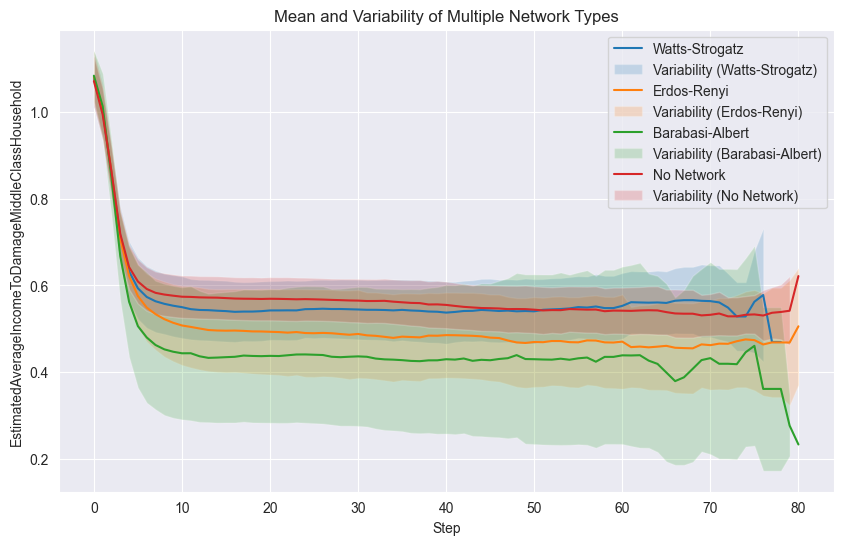

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming 'estimated_ratio_watts_strogatz' is your DataFrame with columns 'RunId', 'Step', and 'EstimatedAverageIncomeToDamageMiddleClassHousehold'
# Assuming 'estimated_ratio_erdos_renyi' is another DataFrame with the same structure
# Assuming 'estimated_ratio_barbasi_albert' is another DataFrame with the same structure
# Assuming 'estimated_ratio_no_network' is another DataFrame with the same structure

# Calculate the mean and standard deviation for each step in the first DataFrame
mean_values_watts_strogatz = estimated_ratio_watts_strogatz.groupby('Step')['EstimatedAverageIncomeToDamageMiddleClassHousehold'].mean()
std_values_watts_strogatz = estimated_ratio_watts_strogatz.groupby('Step')['EstimatedAverageIncomeToDamageMiddleClassHousehold'].std()

# Calculate the mean and standard deviation for each step in the second DataFrame
mean_values_erdos_renyi = estimated_ratio_erdos_renyi.groupby('Step')['EstimatedAverageIncomeToDamageMiddleClassHousehold'].mean()
std_values_erdos_renyi = estimated_ratio_erdos_renyi.groupby('Step')['EstimatedAverageIncomeToDamageMiddleClassHousehold'].std()

# Calculate the mean and standard deviation for each step in the third DataFrame
mean_values_barbasi_albert = estimated_ratio_barbasi_albert.groupby('Step')['EstimatedAverageIncomeToDamageMiddleClassHousehold'].mean()
std_values_barbasi_albert = estimated_ratio_barbasi_albert.groupby('Step')['EstimatedAverageIncomeToDamageMiddleClassHousehold'].std()

# Calculate the mean and standard deviation for each step in the fourth DataFrame
mean_values_no_network = estimated_ratio_no_network.groupby('Step')['EstimatedAverageIncomeToDamageMiddleClassHousehold'].mean()
std_values_no_network = estimated_ratio_no_network.groupby('Step')['EstimatedAverageIncomeToDamageMiddleClassHousehold'].std()

# Plot the mean line for the first DataFrame
ax.plot(mean_values_watts_strogatz.index, mean_values_watts_strogatz, label='Watts-Strogatz')

# Fill between the upper and lower bounds for the first DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_watts_strogatz.index, mean_values_watts_strogatz - std_values_watts_strogatz, mean_values_watts_strogatz + std_values_watts_strogatz, alpha=0.2, label='Variability (Watts-Strogatz)')

# Plot the mean line for the second DataFrame
ax.plot(mean_values_erdos_renyi.index, mean_values_erdos_renyi, label='Erdos-Renyi')

# Fill between the upper and lower bounds for the second DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_erdos_renyi.index, mean_values_erdos_renyi - std_values_erdos_renyi, mean_values_erdos_renyi + std_values_erdos_renyi, alpha=0.2, label='Variability (Erdos-Renyi)')

# Plot the mean line for the third DataFrame
ax.plot(mean_values_barbasi_albert.index, mean_values_barbasi_albert, label='Barabasi-Albert')

# Fill between the upper and lower bounds for the third DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_barbasi_albert.index, mean_values_barbasi_albert - std_values_barbasi_albert, mean_values_barbasi_albert + std_values_barbasi_albert, alpha=0.2, label='Variability (Barabasi-Albert)')

# Plot the mean line for the fourth DataFrame
ax.plot(mean_values_no_network.index, mean_values_no_network, label='No Network')

# Fill between the upper and lower bounds for the fourth DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_no_network.index, mean_values_no_network - std_values_no_network, mean_values_no_network + std_values_no_network, alpha=0.2, label='Variability (No Network)')

# Customize labels and title
ax.set_xlabel('Step')
ax.set_ylabel('EstimatedAverageIncomeToDamageMiddleClassHousehold')
ax.set_title('Mean and Variability of Multiple Network Types')

# Show legend
ax.legend()

# Display the plot
plt.show()


In [10]:
estimated_damage_watts_strogatz = watts_strogatz[['RunId', 'Step', 'EstimatedAverageDamagePerMiddleClassHousehold']]
estimated_damage_erdos_renyi = erdos_renyi[['RunId', 'Step', 'EstimatedAverageDamagePerMiddleClassHousehold']]
estimated_damage_barbasi_albert = barabasi_albert[['RunId', 'Step', 'EstimatedAverageDamagePerMiddleClassHousehold']]
estimated_damage_no_network = no_network[['RunId', 'Step', 'EstimatedAverageDamagePerMiddleClassHousehold']]

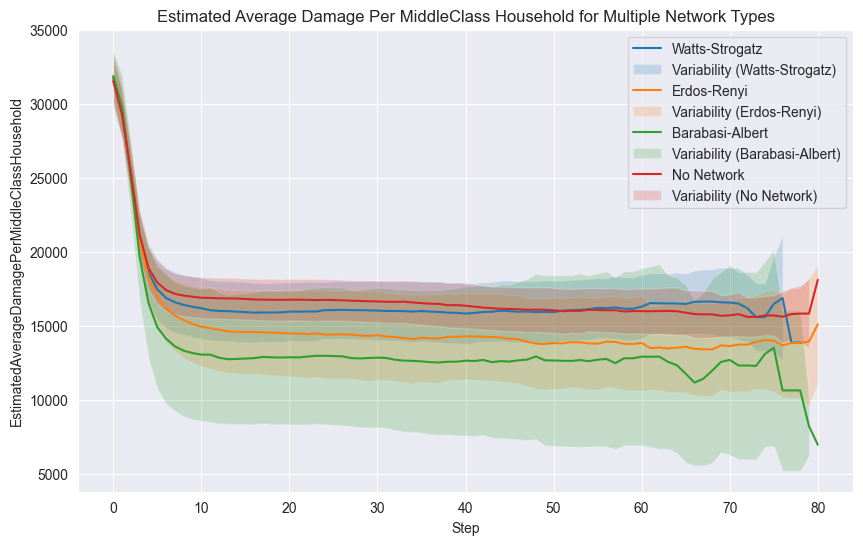

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

# Assuming 'estimated_damage_watts_strogatz' is your DataFrame with columns 'RunId', 'Step', and 'EstimatedAverageDamagePerMiddleClassHousehold'
# Assuming 'estimated_damage_erdos_renyi' is another DataFrame with the same structure
# Assuming 'estimated_damage_barbasi_albert' is another DataFrame with the same structure
# Assuming 'estimated_damage_no_network' is another DataFrame with the same structure

# Calculate the mean and standard deviation for each step in the first DataFrame
mean_values_watts_strogatz = estimated_damage_watts_strogatz.groupby('Step')['EstimatedAverageDamagePerMiddleClassHousehold'].mean()
std_values_watts_strogatz = estimated_damage_watts_strogatz.groupby('Step')['EstimatedAverageDamagePerMiddleClassHousehold'].std()

# Calculate the mean and standard deviation for each step in the second DataFrame
mean_values_erdos_renyi = estimated_damage_erdos_renyi.groupby('Step')['EstimatedAverageDamagePerMiddleClassHousehold'].mean()
std_values_erdos_renyi = estimated_damage_erdos_renyi.groupby('Step')['EstimatedAverageDamagePerMiddleClassHousehold'].std()

# Calculate the mean and standard deviation for each step in the third DataFrame
mean_values_barbasi_albert = estimated_damage_barbasi_albert.groupby('Step')['EstimatedAverageDamagePerMiddleClassHousehold'].mean()
std_values_barbasi_albert = estimated_damage_barbasi_albert.groupby('Step')['EstimatedAverageDamagePerMiddleClassHousehold'].std()

# Calculate the mean and standard deviation for each step in the fourth DataFrame
mean_values_no_network = estimated_damage_no_network.groupby('Step')['EstimatedAverageDamagePerMiddleClassHousehold'].mean()
std_values_no_network = estimated_damage_no_network.groupby('Step')['EstimatedAverageDamagePerMiddleClassHousehold'].std()

# Plot the mean line for the first DataFrame
ax.plot(mean_values_watts_strogatz.index, mean_values_watts_strogatz, label='Watts-Strogatz')

# Fill between the upper and lower bounds for the first DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_watts_strogatz.index, mean_values_watts_strogatz - std_values_watts_strogatz, mean_values_watts_strogatz + std_values_watts_strogatz, alpha=0.2, label='Variability (Watts-Strogatz)')

# Plot the mean line for the second DataFrame
ax.plot(mean_values_erdos_renyi.index, mean_values_erdos_renyi, label='Erdos-Renyi')

# Fill between the upper and lower bounds for the second DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_erdos_renyi.index, mean_values_erdos_renyi - std_values_erdos_renyi, mean_values_erdos_renyi + std_values_erdos_renyi, alpha=0.2, label='Variability (Erdos-Renyi)')

# Plot the mean line for the third DataFrame
ax.plot(mean_values_barbasi_albert.index, mean_values_barbasi_albert, label='Barabasi-Albert')

# Fill between the upper and lower bounds for the third DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_barbasi_albert.index, mean_values_barbasi_albert - std_values_barbasi_albert, mean_values_barbasi_albert + std_values_barbasi_albert, alpha=0.2, label='Variability (Barabasi-Albert)')

# Plot the mean line for the fourth DataFrame
ax.plot(mean_values_no_network.index, mean_values_no_network, label='No Network')

# Fill between the upper and lower bounds for the fourth DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_no_network.index, mean_values_no_network - std_values_no_network, mean_values_no_network + std_values_no_network, alpha=0.2, label='Variability (No Network)')

# Customize labels and title
ax.set_xlabel('Step')
ax.set_ylabel('EstimatedAverageDamagePerMiddleClassHousehold')
ax.set_title('Estimated Average Damage Per MiddleClass Household for Multiple Network Types')

# Show legend
ax.legend()

# Display the plot
plt.show()

# Rich

In [12]:
estimated_ratio_watts_strogatz = watts_strogatz[['RunId', 'Step', 'EstimatedAverageIncomeToDamageRichHousehold']]
estimated_ratio_erdos_renyi = erdos_renyi[['RunId', 'Step', 'EstimatedAverageIncomeToDamageRichHousehold']]
estimated_ratio_barbasi_albert = barabasi_albert[['RunId', 'Step', 'EstimatedAverageIncomeToDamageRichHousehold']]
estimated_ratio_no_network = no_network[['RunId', 'Step', 'EstimatedAverageIncomeToDamageRichHousehold']]

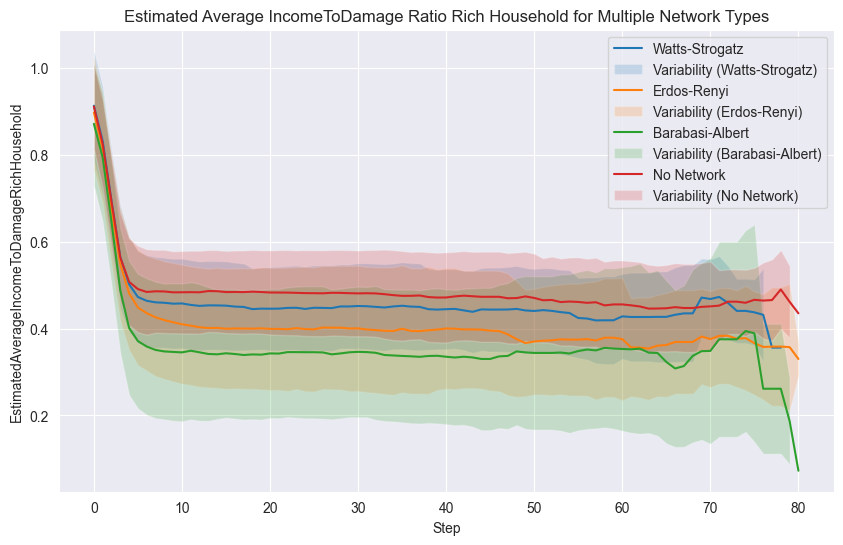

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

# Assuming 'estimated_ratio_watts_strogatz' is your DataFrame with columns 'RunId', 'Step', and 'EstimatedAverageIncomeToDamageRichHousehold'
# Assuming 'estimated_ratio_erdos_renyi' is another DataFrame with the same structure
# Assuming 'estimated_ratio_barbasi_albert' is another DataFrame with the same structure
# Assuming 'estimated_ratio_no_network' is another DataFrame with the same structure

# Calculate the mean and standard deviation for each step in the first DataFrame
mean_values_watts_strogatz = estimated_ratio_watts_strogatz.groupby('Step')['EstimatedAverageIncomeToDamageRichHousehold'].mean()
std_values_watts_strogatz = estimated_ratio_watts_strogatz.groupby('Step')['EstimatedAverageIncomeToDamageRichHousehold'].std()

# Calculate the mean and standard deviation for each step in the second DataFrame
mean_values_erdos_renyi = estimated_ratio_erdos_renyi.groupby('Step')['EstimatedAverageIncomeToDamageRichHousehold'].mean()
std_values_erdos_renyi = estimated_ratio_erdos_renyi.groupby('Step')['EstimatedAverageIncomeToDamageRichHousehold'].std()

# Calculate the mean and standard deviation for each step in the third DataFrame
mean_values_barbasi_albert = estimated_ratio_barbasi_albert.groupby('Step')['EstimatedAverageIncomeToDamageRichHousehold'].mean()
std_values_barbasi_albert = estimated_ratio_barbasi_albert.groupby('Step')['EstimatedAverageIncomeToDamageRichHousehold'].std()

# Calculate the mean and standard deviation for each step in the fourth DataFrame
mean_values_no_network = estimated_ratio_no_network.groupby('Step')['EstimatedAverageIncomeToDamageRichHousehold'].mean()
std_values_no_network = estimated_ratio_no_network.groupby('Step')['EstimatedAverageIncomeToDamageRichHousehold'].std()

# Plot the mean line for the first DataFrame
ax.plot(mean_values_watts_strogatz.index, mean_values_watts_strogatz, label='Watts-Strogatz')

# Fill between the upper and lower bounds for the first DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_watts_strogatz.index, mean_values_watts_strogatz - std_values_watts_strogatz, mean_values_watts_strogatz + std_values_watts_strogatz, alpha=0.2, label='Variability (Watts-Strogatz)')

# Plot the mean line for the second DataFrame
ax.plot(mean_values_erdos_renyi.index, mean_values_erdos_renyi, label='Erdos-Renyi')

# Fill between the upper and lower bounds for the second DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_erdos_renyi.index, mean_values_erdos_renyi - std_values_erdos_renyi, mean_values_erdos_renyi + std_values_erdos_renyi, alpha=0.2, label='Variability (Erdos-Renyi)')

# Plot the mean line for the third DataFrame
ax.plot(mean_values_barbasi_albert.index, mean_values_barbasi_albert, label='Barabasi-Albert')

# Fill between the upper and lower bounds for the third DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_barbasi_albert.index, mean_values_barbasi_albert - std_values_barbasi_albert, mean_values_barbasi_albert + std_values_barbasi_albert, alpha=0.2, label='Variability (Barabasi-Albert)')

# Plot the mean line for the fourth DataFrame
ax.plot(mean_values_no_network.index, mean_values_no_network, label='No Network')

# Fill between the upper and lower bounds for the fourth DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_no_network.index, mean_values_no_network - std_values_no_network, mean_values_no_network + std_values_no_network, alpha=0.2, label='Variability (No Network)')

# Customize labels and title
ax.set_xlabel('Step')
ax.set_ylabel('EstimatedAverageIncomeToDamageRichHousehold')
ax.set_title('Estimated Average IncomeToDamage Ratio Rich Household for Multiple Network Types')

# Show legend
ax.legend()

# Display the plot
plt.show()

In [14]:
estimated_damage_watts_strogatz = watts_strogatz[['RunId', 'Step', 'EstimatedAverageDamagePerRichHousehold']]
estimated_damage_erdos_renyi = erdos_renyi[['RunId', 'Step', 'EstimatedAverageDamagePerRichHousehold']]
estimated_damage_barbasi_albert = barabasi_albert[['RunId', 'Step', 'EstimatedAverageDamagePerRichHousehold']]
estimated_damage_no_network = no_network[['RunId', 'Step', 'EstimatedAverageDamagePerRichHousehold']]

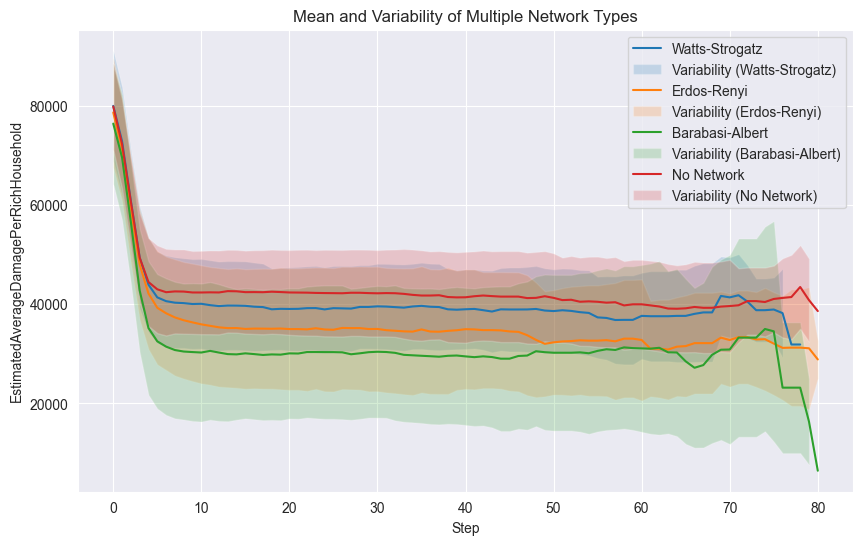

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming 'estimated_damage_watts_strogatz' is your DataFrame with columns 'RunId', 'Step', and 'EstimatedAverageDamagePerRichHousehold'
# Assuming 'estimated_damage_erdos_renyi' is another DataFrame with the same structure
# Assuming 'estimated_damage_barbasi_albert' is another DataFrame with the same structure
# Assuming 'estimated_damage_no_network' is another DataFrame with the same structure

# Calculate the mean and standard deviation for each step in the first DataFrame
mean_values_watts_strogatz = estimated_damage_watts_strogatz.groupby('Step')['EstimatedAverageDamagePerRichHousehold'].mean()
std_values_watts_strogatz = estimated_damage_watts_strogatz.groupby('Step')['EstimatedAverageDamagePerRichHousehold'].std()

# Calculate the mean and standard deviation for each step in the second DataFrame
mean_values_erdos_renyi = estimated_damage_erdos_renyi.groupby('Step')['EstimatedAverageDamagePerRichHousehold'].mean()
std_values_erdos_renyi = estimated_damage_erdos_renyi.groupby('Step')['EstimatedAverageDamagePerRichHousehold'].std()

# Calculate the mean and standard deviation for each step in the third DataFrame
mean_values_barbasi_albert = estimated_damage_barbasi_albert.groupby('Step')['EstimatedAverageDamagePerRichHousehold'].mean()
std_values_barbasi_albert = estimated_damage_barbasi_albert.groupby('Step')['EstimatedAverageDamagePerRichHousehold'].std()

# Calculate the mean and standard deviation for each step in the fourth DataFrame
mean_values_no_network = estimated_damage_no_network.groupby('Step')['EstimatedAverageDamagePerRichHousehold'].mean()
std_values_no_network = estimated_damage_no_network.groupby('Step')['EstimatedAverageDamagePerRichHousehold'].std()

# Plot the mean line for the first DataFrame
ax.plot(mean_values_watts_strogatz.index, mean_values_watts_strogatz, label='Watts-Strogatz')

# Fill between the upper and lower bounds for the first DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_watts_strogatz.index, mean_values_watts_strogatz - std_values_watts_strogatz, mean_values_watts_strogatz + std_values_watts_strogatz, alpha=0.2, label='Variability (Watts-Strogatz)')

# Plot the mean line for the second DataFrame
ax.plot(mean_values_erdos_renyi.index, mean_values_erdos_renyi, label='Erdos-Renyi')

# Fill between the upper and lower bounds for the second DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_erdos_renyi.index, mean_values_erdos_renyi - std_values_erdos_renyi, mean_values_erdos_renyi + std_values_erdos_renyi, alpha=0.2, label='Variability (Erdos-Renyi)')

# Plot the mean line for the third DataFrame
ax.plot(mean_values_barbasi_albert.index, mean_values_barbasi_albert, label='Barabasi-Albert')

# Fill between the upper and lower bounds for the third DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_barbasi_albert.index, mean_values_barbasi_albert - std_values_barbasi_albert, mean_values_barbasi_albert + std_values_barbasi_albert, alpha=0.2, label='Variability (Barabasi-Albert)')

# Plot the mean line for the fourth DataFrame
ax.plot(mean_values_no_network.index, mean_values_no_network, label='No Network')

# Fill between the upper and lower bounds for the fourth DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_no_network.index, mean_values_no_network - std_values_no_network, mean_values_no_network + std_values_no_network, alpha=0.2, label='Variability (No Network)')

# Customize labels and title
ax.set_xlabel('Step')
ax.set_ylabel('EstimatedAverageDamagePerRichHousehold')
ax.set_title('Mean and Variability of Multiple Network Types')

# Show legend
ax.legend()

# Display the plot
plt.show()


# Adapted Households

In [8]:
adapted_households_watts_strogatz = watts_strogatz[['RunId', 'Step', 'TotalAdaptedHouseholds']]
adapted_households_erdos_renyi = erdos_renyi[['RunId', 'Step', 'TotalAdaptedHouseholds']]
adapted_households_barbasi_albert = barabasi_albert[['RunId', 'Step', 'TotalAdaptedHouseholds']]
adapted_households_no_network = no_network[['RunId', 'Step', 'TotalAdaptedHouseholds']]

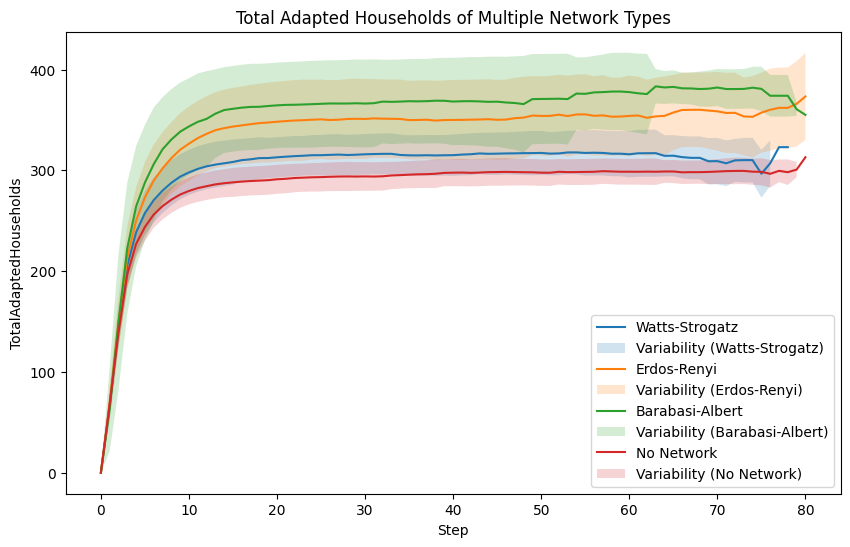

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming 'adapted_households_watts_strogatz' is your DataFrame with columns 'RunId', 'Step', and 'TotalAdaptedHouseholds'
# Assuming 'adapted_households_erdos_renyi' is another DataFrame with the same structure
# Assuming 'adapted_households_barbasi_albert' is another DataFrame with the same structure
# Assuming 'adapted_households_no_network' is another DataFrame with the same structure

# Calculate the mean and standard deviation for each step in the first DataFrame
mean_values_watts_strogatz = adapted_households_watts_strogatz.groupby('Step')['TotalAdaptedHouseholds'].mean()
std_values_watts_strogatz = adapted_households_watts_strogatz.groupby('Step')['TotalAdaptedHouseholds'].std()

# Calculate the mean and standard deviation for each step in the second DataFrame
mean_values_erdos_renyi = adapted_households_erdos_renyi.groupby('Step')['TotalAdaptedHouseholds'].mean()
std_values_erdos_renyi = adapted_households_erdos_renyi.groupby('Step')['TotalAdaptedHouseholds'].std()

# Calculate the mean and standard deviation for each step in the third DataFrame
mean_values_barbasi_albert = adapted_households_barbasi_albert.groupby('Step')['TotalAdaptedHouseholds'].mean()
std_values_barbasi_albert = adapted_households_barbasi_albert.groupby('Step')['TotalAdaptedHouseholds'].std()

# Calculate the mean and standard deviation for each step in the fourth DataFrame
mean_values_no_network = adapted_households_no_network.groupby('Step')['TotalAdaptedHouseholds'].mean()
std_values_no_network = adapted_households_no_network.groupby('Step')['TotalAdaptedHouseholds'].std()

# Plot the mean line for the first DataFrame
ax.plot(mean_values_watts_strogatz.index, mean_values_watts_strogatz, label='Watts-Strogatz')

# Fill between the upper and lower bounds for the first DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_watts_strogatz.index, mean_values_watts_strogatz - std_values_watts_strogatz, mean_values_watts_strogatz + std_values_watts_strogatz, alpha=0.2, label='Variability (Watts-Strogatz)')

# Plot the mean line for the second DataFrame
ax.plot(mean_values_erdos_renyi.index, mean_values_erdos_renyi, label='Erdos-Renyi')

# Fill between the upper and lower bounds for the second DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_erdos_renyi.index, mean_values_erdos_renyi - std_values_erdos_renyi, mean_values_erdos_renyi + std_values_erdos_renyi, alpha=0.2, label='Variability (Erdos-Renyi)')

# Plot the mean line for the third DataFrame
ax.plot(mean_values_barbasi_albert.index, mean_values_barbasi_albert, label='Barabasi-Albert')

# Fill between the upper and lower bounds for the third DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_barbasi_albert.index, mean_values_barbasi_albert - std_values_barbasi_albert, mean_values_barbasi_albert + std_values_barbasi_albert, alpha=0.2, label='Variability (Barabasi-Albert)')

# Plot the mean line for the fourth DataFrame
ax.plot(mean_values_no_network.index, mean_values_no_network, label='No Network')

# Fill between the upper and lower bounds for the fourth DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_no_network.index, mean_values_no_network - std_values_no_network, mean_values_no_network + std_values_no_network, alpha=0.2, label='Variability (No Network)')

# Customize labels and title
ax.set_xlabel('Step')
ax.set_ylabel('TotalAdaptedHouseholds')
ax.set_title('Total Adapted Households of Multiple Network Types')

# Show legend
ax.legend()

# Display the plot
plt.show()



### One-way ANOVA test for Adapted Households and Total Actual Damage
Because the decision to adapt is strongly dependent on the flood perception of a Household, the network perception is equally important. Using the different network forming principles, every agent gets different "friends". To test of the difference between the networks is significant, a One-way ANOVA test is applied.

In [18]:
from scipy.stats import f_oneway
end_values = sensitivity_analysis.copy()
only_end_values = end_values[end_values['TotalActualDamage'] != 0]
only_end_values

,RunId,iteration,Step,number_of_households,number_of_steps,flood_map_choice,network,TotalAdaptedHouseholds,TotalActualDamage,TotalExpectedDamage,...,EstimatedAverageDamagePerRichHousehold,EstimatedAverageIncomeToDamagePoorHousehold,EstimatedAverageIncomeToDamageMiddleClassHousehold,EstimatedAverageIncomeToDamageRichHousehold,AverageDamagePerPoorHousehold,AverageDamagePerMiddleClassHousehold,AverageDamagePerRichHousehold,AverageIncomeToDamagePoorHousehold,AverageIncomeToDamageMiddleClassHousehold,AverageIncomeToDamageRichHousehold
56,0,0,56,1000,80,100yr,watts_strogatz,352,1.513472e+07,1.622010e+07,...,43403.257320,1.472745,0.547813,0.487633,6905.038560,15066.114277,40492.978148,1.362110,0.512072,0.454936
122,1,0,65,1000,80,100yr,erdos_renyi,313,1.377484e+07,1.473295e+07,...,20903.013127,1.761716,0.533059,0.237741,8116.836507,14997.230216,19108.448434,1.623982,0.502190,0.217331
129,2,0,6,1000,80,100yr,barabasi_albert,321,1.195450e+07,1.265214e+07,...,30481.283223,1.952175,0.348833,0.340301,9628.368990,9811.793228,28990.446256,1.850712,0.328086,0.323656
162,3,0,32,1000,80,100yr,no_network,257,1.493420e+07,1.588000e+07,...,40033.653326,1.757500,0.494524,0.472161,8409.129337,13697.712251,38198.298203,1.657702,0.461781,0.450515
206,4,1,43,1000,80,100yr,watts_strogatz,323,1.358067e+07,1.444993e+07,...,35970.061538,1.729264,0.460972,0.405288,7882.462494,12486.598449,33780.862467,1.634988,0.432759,0.380621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16698,395,98,5,1000,80,100yr,no_network,211,1.744555e+07,1.877378e+07,...,42794.805483,2.827937,0.590864,0.488267,13027.703608,16189.690445,40032.291794,2.604371,0.549600,0.456748
16753,396,99,54,1000,80,100yr,watts_strogatz,326,1.731370e+07,1.854011e+07,...,55314.686981,1.671944,0.529456,0.649289,8155.749777,14438.666902,52647.069755,1.571128,0.487368,0.617976
16815,397,99,61,1000,80,100yr,erdos_renyi,406,1.122677e+07,1.217305e+07,...,30823.141890,0.935398,0.424865,0.365846,4435.621192,11547.416073,28715.050886,0.860237,0.390577,0.340824
16855,398,99,39,1000,80,100yr,barabasi_albert,384,1.620172e+07,1.751369e+07,...,50122.110995,1.874525,0.549433,0.582033,8438.965405,15002.446267,46459.096379,1.697617,0.510344,0.539497


In [19]:
only_end_values

,RunId,iteration,Step,number_of_households,number_of_steps,flood_map_choice,network,TotalAdaptedHouseholds,TotalActualDamage,TotalExpectedDamage,...,EstimatedAverageDamagePerRichHousehold,EstimatedAverageIncomeToDamagePoorHousehold,EstimatedAverageIncomeToDamageMiddleClassHousehold,EstimatedAverageIncomeToDamageRichHousehold,AverageDamagePerPoorHousehold,AverageDamagePerMiddleClassHousehold,AverageDamagePerRichHousehold,AverageIncomeToDamagePoorHousehold,AverageIncomeToDamageMiddleClassHousehold,AverageIncomeToDamageRichHousehold
56,0,0,56,1000,80,100yr,watts_strogatz,352,1.513472e+07,1.622010e+07,...,43403.257320,1.472745,0.547813,0.487633,6905.038560,15066.114277,40492.978148,1.362110,0.512072,0.454936
122,1,0,65,1000,80,100yr,erdos_renyi,313,1.377484e+07,1.473295e+07,...,20903.013127,1.761716,0.533059,0.237741,8116.836507,14997.230216,19108.448434,1.623982,0.502190,0.217331
129,2,0,6,1000,80,100yr,barabasi_albert,321,1.195450e+07,1.265214e+07,...,30481.283223,1.952175,0.348833,0.340301,9628.368990,9811.793228,28990.446256,1.850712,0.328086,0.323656
162,3,0,32,1000,80,100yr,no_network,257,1.493420e+07,1.588000e+07,...,40033.653326,1.757500,0.494524,0.472161,8409.129337,13697.712251,38198.298203,1.657702,0.461781,0.450515
206,4,1,43,1000,80,100yr,watts_strogatz,323,1.358067e+07,1.444993e+07,...,35970.061538,1.729264,0.460972,0.405288,7882.462494,12486.598449,33780.862467,1.634988,0.432759,0.380621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16698,395,98,5,1000,80,100yr,no_network,211,1.744555e+07,1.877378e+07,...,42794.805483,2.827937,0.590864,0.488267,13027.703608,16189.690445,40032.291794,2.604371,0.549600,0.456748
16753,396,99,54,1000,80,100yr,watts_strogatz,326,1.731370e+07,1.854011e+07,...,55314.686981,1.671944,0.529456,0.649289,8155.749777,14438.666902,52647.069755,1.571128,0.487368,0.617976
16815,397,99,61,1000,80,100yr,erdos_renyi,406,1.122677e+07,1.217305e+07,...,30823.141890,0.935398,0.424865,0.365846,4435.621192,11547.416073,28715.050886,0.860237,0.390577,0.340824
16855,398,99,39,1000,80,100yr,barabasi_albert,384,1.620172e+07,1.751369e+07,...,50122.110995,1.874525,0.549433,0.582033,8438.965405,15002.446267,46459.096379,1.697617,0.510344,0.539497


In [20]:
watts_strogatz_end = pd.DataFrame()
condition = only_end_values['network'] == "watts_strogatz"
watts_strogatz_end = pd.concat([only_end_values[condition], watts_strogatz_end], ignore_index=True)

erdos_renyi_end = pd.DataFrame()
condition = only_end_values['network'] == "erdos_renyi"
erdos_renyi_end = pd.concat([only_end_values[condition], erdos_renyi_end], ignore_index=True)

barabasi_albert_end = pd.DataFrame()
condition = only_end_values['network'] == "barabasi_albert"
barabasi_albert_end = pd.concat([only_end_values[condition], barabasi_albert_end], ignore_index=True)

no_network_end = pd.DataFrame()
condition = only_end_values['network'] == "no_network"
no_network_end = pd.concat([only_end_values[condition], no_network_end], ignore_index=True)


In [21]:
watts_strogatz_end_adapted_households = watts_strogatz_end['TotalAdaptedHouseholds'].tolist()
erdos_renyi_end_adapted_households = erdos_renyi_end['TotalAdaptedHouseholds'].tolist()
barabasi_albert_end_adapted_households = barabasi_albert_end['TotalAdaptedHouseholds'].tolist()
no_network_end_adapted_households = no_network_end['TotalAdaptedHouseholds'].tolist()

In [22]:
f_oneway(watts_strogatz_end_adapted_households, erdos_renyi_end_adapted_households, barabasi_albert_end_adapted_households, no_network_end_adapted_households)

F_onewayResult(statistic=31.476310574811, pvalue=2.870528301302581e-18)

In [23]:
watts_strogatz_end_actual_damage = watts_strogatz_end['TotalActualDamage'].tolist()
erdos_renyi_end_actual_damage  = erdos_renyi_end['TotalActualDamage'].tolist()
barabasi_albert_end_actual_damage  = barabasi_albert_end['TotalActualDamage'].tolist()
no_network_end_actual_damage  = no_network_end['TotalActualDamage'].tolist()

In [24]:
f_oneway(watts_strogatz_end_actual_damage, erdos_renyi_end_actual_damage, barabasi_albert_end_actual_damage, no_network_end_actual_damage)

F_onewayResult(statistic=17.58856732782612, pvalue=9.738664130992115e-11)